In [8]:
%pip install --upgrade plotly

Note: you may need to restart the kernel to use updated packages.


In [9]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [10]:
pd.options.display.float_format = '{:,.2f}'.format

In [11]:
df_data = pd.read_csv('NLSY97_subset.csv')[['EARNINGS','S', 'EXP']]

In [12]:
df_data.shape

(2000, 3)

In [13]:
df_data.describe()

,EARNINGS,S,EXP
count,"2,000.00","2,000.00","2,000.00"
mean,18.87,14.58,6.72
std,11.95,2.74,2.84
min,2.00,6.00,0.00
25%,11.54,12.00,4.69
50%,15.75,15.00,6.63
75%,22.70,16.00,8.70
max,132.89,20.00,14.73


In [14]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   EARNINGS  2000 non-null   float64
 1   S         2000 non-null   int64  
 2   EXP       2000 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 47.0 KB


In [15]:
df_data.sample(5)

,EARNINGS,S,EXP
1087,18.50,12,10.15
1128,39.00,12,10.94
768,35.00,16,1.27
1681,26.92,17,5.38
314,33.65,20,1.87


In [16]:
df_data.isna().values.sum()

0

In [17]:
df_data.duplicated().values.sum()

514

In [18]:
df_data.describe()

,EARNINGS,S,EXP
count,"2,000.00","2,000.00","2,000.00"
mean,18.87,14.58,6.72
std,11.95,2.74,2.84
min,2.00,6.00,0.00
25%,11.54,12.00,4.69
50%,15.75,15.00,6.63
75%,22.70,16.00,8.70
max,132.89,20.00,14.73


<Figure size 1600x800 with 0 Axes>

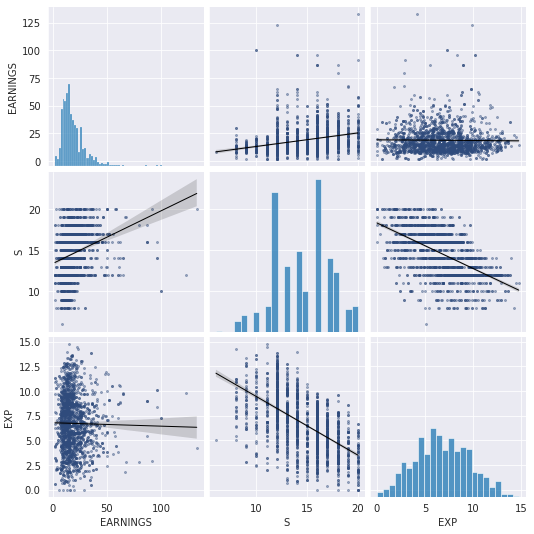

In [19]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("darkgrid"):
    sns.pairplot(df_data,
                 kind='reg', 
                 plot_kws={
                     'line_kws': {'color': 'black', 'lw': 1}, 
                     'scatter_kws': {'color': '#2f4b7c', 'alpha': 0.4, 's': 4}
                 })
plt.show()

<Figure size 2400x800 with 0 Axes>

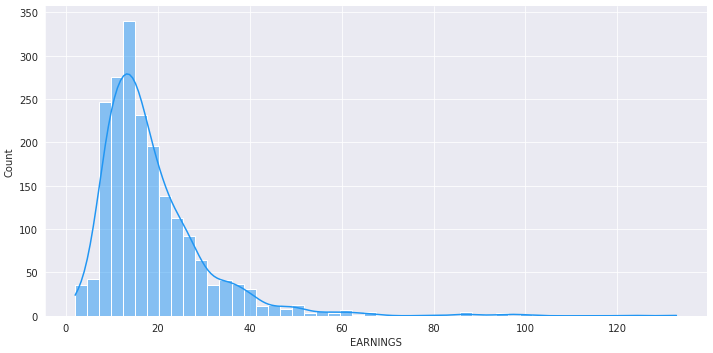

<Figure size 2400x800 with 0 Axes>

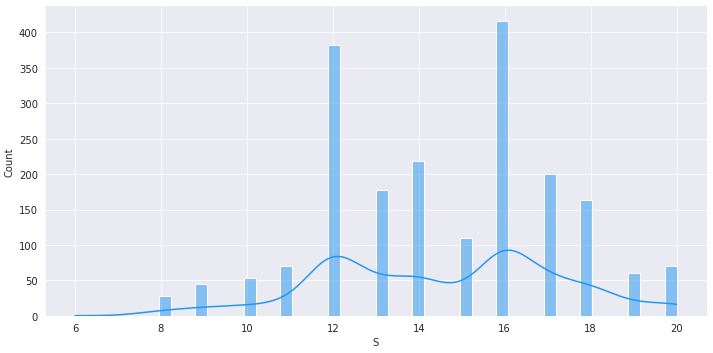

<Figure size 2400x800 with 0 Axes>

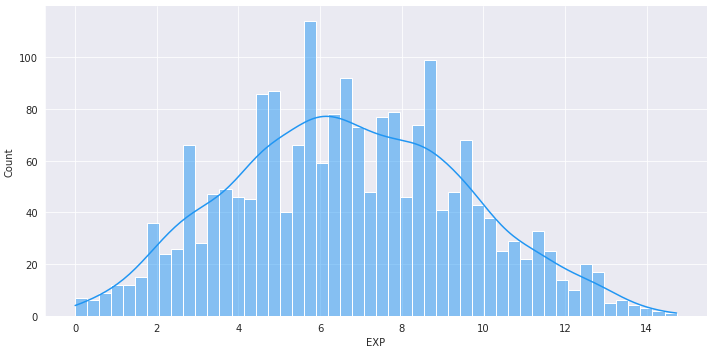

In [20]:
for column in df_data.columns.values:
    plt.figure(figsize=(12, 4), dpi=200)
    with sns.axes_style("darkgrid"):
        sns.displot(data=df_data, x=column, aspect=2, kde=True, color='#2196f3', bins=50)
    plt.show()

In [22]:
X_train, X_test, y_train, y_test = train_test_split(df_data.drop(['EARNINGS', 'EXP'], axis=1), df_data.EARNINGS, test_size=0.2, random_state=1)

In [23]:
train_pct = 100*len(X_train)/len(df_data.drop('EARNINGS' , axis=1))
print(f'Training data is {train_pct:.3}% of the total data.')

test_pct = 100*X_test.shape[0]/df_data.drop('EARNINGS' , axis=1).shape[0]
print(f'Test data makes up the remaining {test_pct:0.3}%.')

Training data is 80.0% of the total data.
Test data makes up the remaining 20.0%.


In [24]:
regr = LinearRegression().fit(X_train, y_train)
rsquared = regr.score(X_train, y_train)
print(f'Training data r-squared: {rsquared:.2}')

Training data r-squared: 0.084


In [25]:
regr_coef = pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['Coefficient'])
regr_coef

,Coefficient
S,1.25


In [26]:
expects = regr_coef.loc['S'].values[0]
print(f'The increment of earnings per hour for having an extra year of schooling is ${expects:.5}')

The increment of earnings per hour for having an extra year of schooling is $1.2481


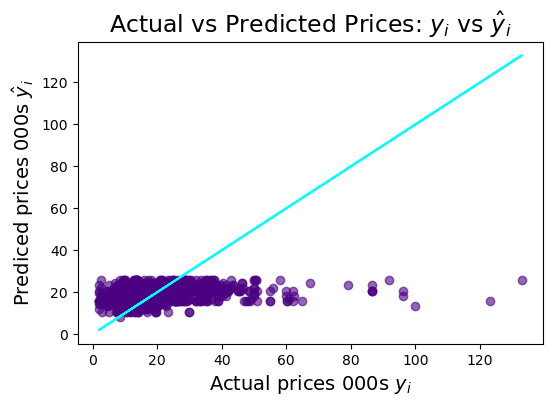

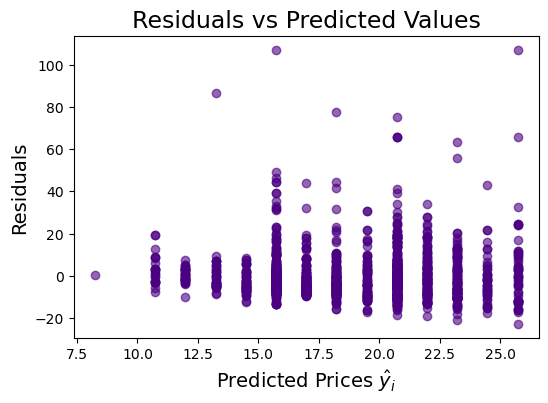

The absolute mean for the residuals of training data is 7.4145


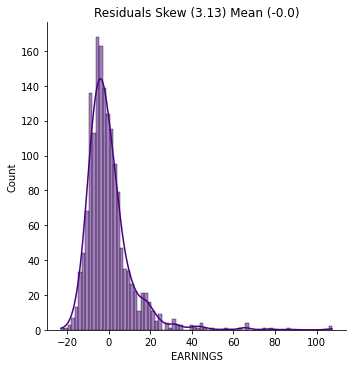

In [28]:
predict_train = regr.predict(X_train)
residuals = (y_train - predict_train)

plt.figure(dpi=100)
plt.scatter(x=y_train, y=predict_train, c='indigo', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')
plt.title(f'Actual vs Predicted Prices: $y _i$ vs $\hat y_i$', fontsize=17)
plt.xlabel('Actual prices 000s $y _i$', fontsize=14)
plt.ylabel('Prediced prices 000s $\hat y _i$', fontsize=14)
plt.show()
print("")

plt.figure(dpi=100)
plt.scatter(x=predict_train, y=residuals, c='indigo', alpha=0.6)
plt.title('Residuals vs Predicted Values', fontsize=17)
plt.xlabel('Predicted Prices $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

mae_train = mean_absolute_error(y_train, predict_train)
print(f"The absolute mean for the residuals of training data is {mae_train:.5}")

resid_mean = round(residuals.mean(), 2)
resid_skew = round(residuals.skew(), 2)

sns.displot(residuals, kde=True, color='indigo')
plt.title(f'Residuals Skew ({resid_skew}) Mean ({resid_mean})')
plt.show()

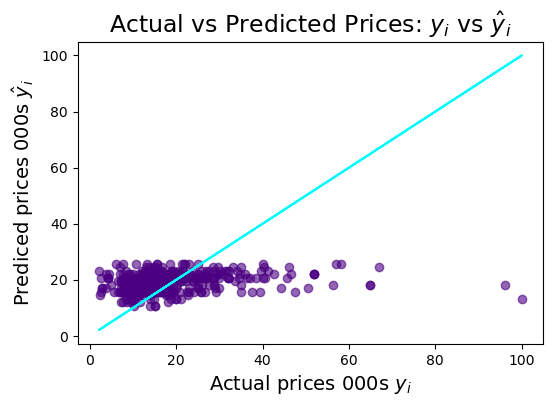

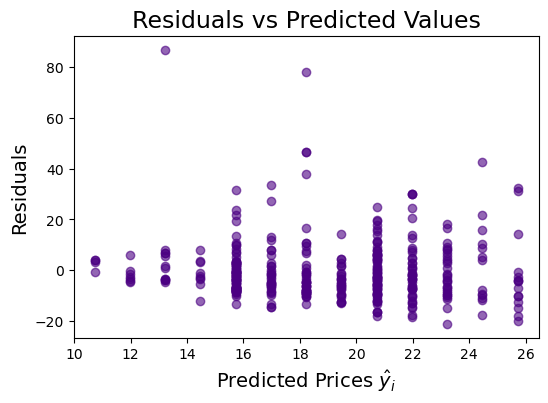

The absolute mean for the residuals of training data is 8.0098


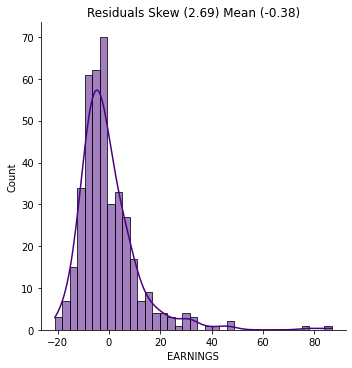

In [29]:
predict_test = regr.predict(X_test)
residuals = (y_test - predict_test)

plt.figure(dpi=100)
plt.scatter(x=y_test, y=predict_test, c='indigo', alpha=0.6)
plt.plot(y_test, y_test, color='cyan')
plt.title(f'Actual vs Predicted Prices: $y _i$ vs $\hat y_i$', fontsize=17)
plt.xlabel('Actual prices 000s $y _i$', fontsize=14)
plt.ylabel('Prediced prices 000s $\hat y _i$', fontsize=14)
plt.show()
print("")

plt.figure(dpi=100)
plt.scatter(x=predict_test, y=residuals, c='indigo', alpha=0.6)
plt.title('Residuals vs Predicted Values', fontsize=17)
plt.xlabel('Predicted Prices $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

mae_test = mean_absolute_error(y_test, predict_test)
print(f"The absolute mean for the residuals of training data is {mae_test:.5}")

resid_mean = round(residuals.mean(), 2)
resid_skew = round(residuals.skew(), 2)

sns.displot(residuals, kde=True, color='indigo')
plt.title(f'Residuals Skew ({resid_skew}) Mean ({resid_mean})')
plt.show()

In [30]:
X_train, X_test, y_train, y_test = train_test_split(df_data.drop(['EARNINGS'], axis=1), df_data.EARNINGS, test_size=0.2, random_state=1)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(df_data.drop(['EARNINGS'], axis=1), df_data.EARNINGS, test_size=0.2, random_state=1)
regr = LinearRegression().fit(X_train, y_train)
rsquared = regr.score(X_train, y_train)
print(f'Training data r-squared: {rsquared:.2}')

Training data r-squared: 0.12


In [32]:
regr_coef = pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['Coefficient'])
regr_coef

,Coefficient
S,1.81
EXP,0.94


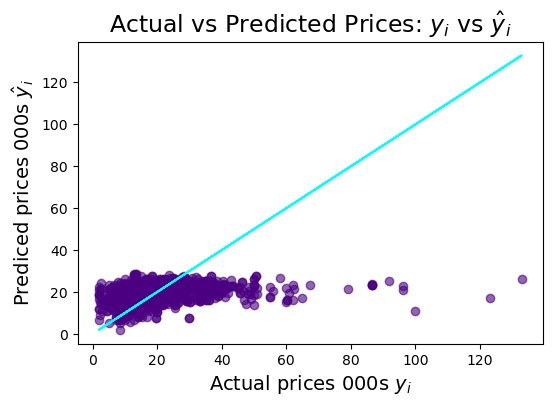

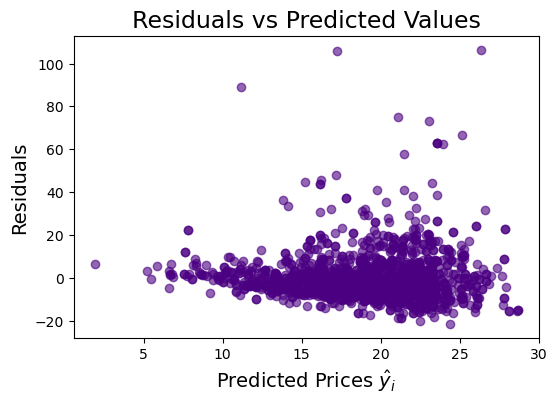

The absolute mean for the residuals of training data is 7.2308


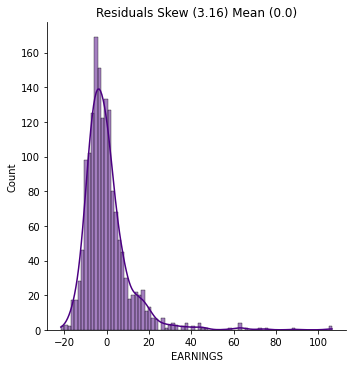

In [33]:
predict_train = regr.predict(X_train)
residuals = (y_train - predict_train)

plt.figure(dpi=100)
plt.scatter(x=y_train, y=predict_train, c='indigo', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')
plt.title(f'Actual vs Predicted Prices: $y _i$ vs $\hat y_i$', fontsize=17)
plt.xlabel('Actual prices 000s $y _i$', fontsize=14)
plt.ylabel('Prediced prices 000s $\hat y _i$', fontsize=14)
plt.show()
print("")

plt.figure(dpi=100)
plt.scatter(x=predict_train, y=residuals, c='indigo', alpha=0.6)
plt.title('Residuals vs Predicted Values', fontsize=17)
plt.xlabel('Predicted Prices $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

mae_train = mean_absolute_error(y_train, predict_train)
print(f"The absolute mean for the residuals of training data is {mae_train:.5}")

resid_mean = round(residuals.mean(), 2)
resid_skew = round(residuals.skew(), 2)

sns.displot(residuals, kde=True, color='indigo')
plt.title(f'Residuals Skew ({resid_skew}) Mean ({resid_mean})')
plt.show()

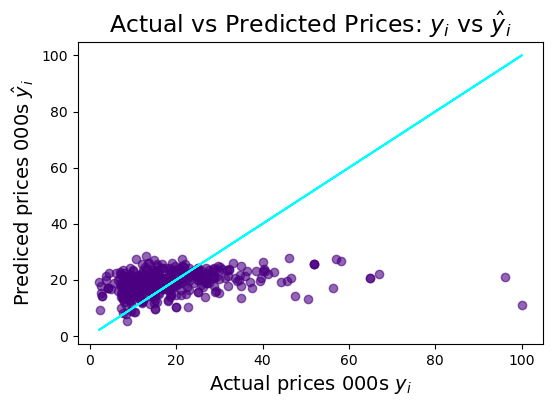

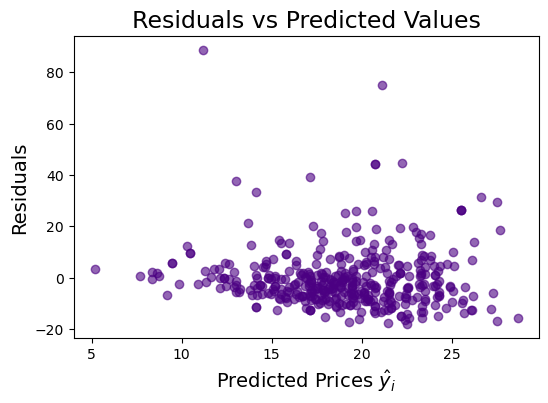

The absolute mean for the residuals of training data is 7.8267


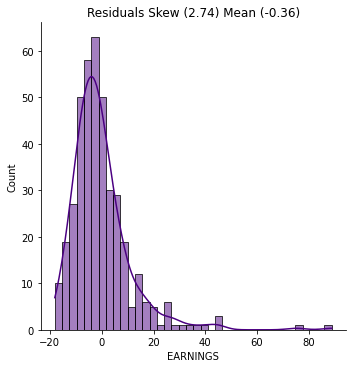

In [34]:
predict_test = regr.predict(X_test)
residuals = (y_test - predict_test)

plt.figure(dpi=100)
plt.scatter(x=y_test, y=predict_test, c='indigo', alpha=0.6)
plt.plot(y_test, y_test, color='cyan')
plt.title(f'Actual vs Predicted Prices: $y _i$ vs $\hat y_i$', fontsize=17)
plt.xlabel('Actual prices 000s $y _i$', fontsize=14)
plt.ylabel('Prediced prices 000s $\hat y _i$', fontsize=14)
plt.show()
print("")

plt.figure(dpi=100)
plt.scatter(x=predict_test, y=residuals, c='indigo', alpha=0.6)
plt.title('Residuals vs Predicted Values', fontsize=17)
plt.xlabel('Predicted Prices $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

mae_test = mean_absolute_error(y_test, predict_test)
print(f"The absolute mean for the residuals of training data is {mae_test:.5}")

resid_mean = round(residuals.mean(), 2)
resid_skew = round(residuals.skew(), 2)

sns.displot(residuals, kde=True, color='indigo')
plt.title(f'Residuals Skew ({resid_skew}) Mean ({resid_mean})')
plt.show()

In [35]:
schooling_year = 16
work_experience = 5

In [37]:
new_features = pd.DataFrame(columns=['S', 'EXP'], data=[['16', '5']])
new_prediction = regr.predict(new_features)[0]
print(f"A person with schooling of {schooling_year} years & work experience of {work_experience} years is predicted to have earnings of ${new_prediction:.2f} per hour")

A person with schooling of 16 years & work experience of 5 years is predicted to have earnings of $19.89 per hour
